In [204]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
from scipy.stats import spearmanr
# from google.colab import drive
# drive.mount('/content/drive')

In [205]:
df=pd.read_excel('PublicHospitalDataset.xlsx')

# **EDA**

## Descripción general

In [206]:
df.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5110 non-null   int64  
 1   Heart Disease      5110 non-null   int64  
 2   Married            5110 non-null   object 
 3   Work               5110 non-null   object 
 4   Residence          5110 non-null   object 
 5   Avg_glucose_level  5110 non-null   float64
 6   Bmi                4909 non-null   float64
 7   Smoking            5110 non-null   object 
 8   Gender             5110 non-null   object 
 9   Age                5110 non-null   float64
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [208]:
df.shape

(5110, 11)

In [209]:
df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,61.463720,43.226614,0.048728
std,0.296607,0.226063,45.283560,1140.662468,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


In [210]:
df.isnull().sum()

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64

## Preprocesamiento

In [211]:
print(df['Hypertension'].value_counts(normalize=True))
print('')
print(df['Hypertension'].value_counts())

0    0.902544
1    0.097456
Name: Hypertension, dtype: float64

0    4612
1     498
Name: Hypertension, dtype: int64


In [212]:
print(df['Heart Disease'].value_counts(normalize=True))
print('')
print(df['Heart Disease'].value_counts())

0    0.945988
1    0.054012
Name: Heart Disease, dtype: float64

0    4834
1     276
Name: Heart Disease, dtype: int64


In [213]:
print(df['Married'].value_counts(normalize=True))
print('')
print(df['Married'].value_counts())
# Hay que codificar DUMMIES

Yes    0.656164
No     0.343836
Name: Married, dtype: float64

Yes    3353
No     1757
Name: Married, dtype: int64


In [214]:
print(df['Work'].value_counts(normalize=True))
print('')
print(df['Work'].value_counts())
# Hay que codificar DUMMIES
# Corregir errores

Private          0.571233
Self-employed    0.160078
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
sdfsdf           0.000587
dsfsdf           0.000391
k–sdh-k          0.000196
sdsd-i           0.000196
Name: Work, dtype: float64

Private          2919
Self-employed     818
children          687
Govt_job          657
Never_worked       22
sdfsdf              3
dsfsdf              2
k–sdh-k             1
sdsd-i              1
Name: Work, dtype: int64


In [215]:
print(df['Residence'].value_counts(normalize=True))
print('')
print(df['Residence'].value_counts())
# Hay que codificar DUMMIES

Urban    0.508023
Rural    0.491977
Name: Residence, dtype: float64

Urban    2596
Rural    2514
Name: Residence, dtype: int64


In [216]:
print(df['Smoking'].value_counts(normalize=True))
print('')
print(df['Smoking'].value_counts())
# Hay que codificar DUMMIES

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: Smoking, dtype: float64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking, dtype: int64


In [217]:
print(df['Gender'].value_counts(normalize=True))
print('')
print(df['Gender'].value_counts())
# Hay que codificar DUMMIES
# Reemplazar Other por Female

Female    0.585910
Male      0.413894
Other     0.000196
Name: Gender, dtype: float64

Female    2994
Male      2115
Other        1
Name: Gender, dtype: int64


In [218]:
df['Stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: Stroke, dtype: float64

### Preprocesamiento variable "Work"

La variable Work tiene algunos valores extraños (sdfsdf, dsfsdf, k–sdh-k, sdsd-i), en total solo son 7 valores; por lo tanto se procede a eliminar estos registros.

In [219]:
df = df[~df.Work.isin(['sdfsdf', 'dsfsdf', 'k–sdh-k', 'sdsd-i'])]
df.reset_index(drop=True, inplace=True)
df['Work'].value_counts()

Private          2919
Self-employed     818
children          687
Govt_job          657
Never_worked       22
Name: Work, dtype: int64

In [220]:
df.shape

(5103, 11)

### Preprocesamiento variable "Gender"

In [221]:
df['Gender'].replace('Other', 'Female', inplace=True)

In [222]:
df['Gender'].value_counts()

Female    2988
Male      2115
Name: Gender, dtype: int64

In [223]:
df.shape

(5103, 11)

### Valores Atípicos

Primero se debe entender si se deben a errores o si realmente podrían existir, para esto hay que hablar con los dueños del proceso o consultar en la literatura.

Finalmente, se decidió aplicar un reemplazo de valores atípicos por un límite superior e inferior, ya que en el caso de Avg_glucose_level se encontró que si pueden existir valores altos; mientras que en el Bmi no existien tantos valores atípicos.

1. Avg_glucose_level
2. Bmi
3. Age

In [224]:
fig_g = px.histogram(df, x="Avg_glucose_level", marginal="box", color_discrete_sequence=['blue'])
fig_b = px.histogram(df, x="Bmi", marginal="box", color_discrete_sequence=['orange'])
fig_a = px.histogram(df, x="Age", marginal="box", color_discrete_sequence=['green'])

fig_g.show()
fig_b.show()
fig_a.show()

In [225]:
df_bmi_outliers = df[df.Bmi > 54].sort_values(by='Bmi')
df_bmi_outliers

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
4902,0,0,Yes,Private,Urban,70.51,54.1,never smoked,Female,53.0,0
759,0,0,No,Private,Rural,92.78,54.2,never smoked,Female,37.0,0
3928,1,0,No,Self-employed,Rural,198.30,54.3,formerly smoked,Female,73.0,0
256,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,Female,74.0,0
635,0,0,Yes,Private,Rural,112.43,54.6,never smoked,Female,56.0,0
331,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,Female,52.0,0
428,0,1,Yes,Private,Urban,72.79,54.7,never smoked,Female,52.0,0
3699,0,0,No,Private,Rural,94.96,54.7,smokes,Male,31.0,0
1320,1,0,Yes,Private,Urban,206.40,54.8,never smoked,Female,55.0,0
1302,0,0,No,Private,Rural,79.63,55.0,Unknown,Female,46.0,0


In [226]:
df_bmi_outliers.shape

(48, 11)

In [227]:
# Función para encontrar los límites-umbral de los outliers
def limites_outliers(df, col):
  q1 = df[col].quantile(0.05)
  q3 = df[col].quantile(0.95)
  iqr = q3 - q1
  lim_sup = q3 + 1.5 * iqr
  lim_inf = q1 - 1.5 * iqr
  return lim_inf, lim_sup

# Función para verificar si existen outliers
def check_outliers(df, col):
  lim_inf, lim_sup = limites_outliers(df, col)
  if df[(df[col] > lim_sup) | (df[col] < lim_inf)].any(axis=None):
    return True
  else:
    return False  

# Función para reemplazar outliers con los límites
def reemplazar_outliers(df, col):
  lim_inf, lim_sup = limites_outliers(df, col)
  df.loc[(df[col] < lim_inf), col] = lim_inf
  df.loc[(df[col] > lim_sup), col] = lim_sup

In [228]:
col_numericas = ['Avg_glucose_level', 'Bmi', 'Age']

print('Umbral para outliers')
for col in col_numericas:
  print(f'{col}: {limites_outliers(df, col)}')
print('')

print('Verificación de outliers')
for col in col_numericas:
  print(f'{col}: {check_outliers(df, col)}')
print('')

print('Reemplazando outliers...')
for col in col_numericas:
  reemplazar_outliers(df, col)
print('')

print('Ya no hay outliers!!!')
for col in col_numericas:
  print(f'{col}: {check_outliers(df, col)}')

Umbral para outliers
Avg_glucose_level: (-172.50949999999992, 449.39049999999986)
Bmi: (-20.250000000000004, 80.95)
Age: (-106.0, 190.0)

Verificación de outliers
Avg_glucose_level: False
Bmi: True
Age: False

Reemplazando outliers...

Ya no hay outliers!!!
Avg_glucose_level: False
Bmi: False
Age: False


In [229]:
df.shape

(5103, 11)

In [230]:
# Después de reemplazar los outliers
fig_g = px.histogram(df, x="Avg_glucose_level", marginal="box", color_discrete_sequence=['blue'])
fig_b = px.histogram(df, x="Bmi", marginal="box", color_discrete_sequence=['orange'])
fig_a = px.histogram(df, x="Age", marginal="box", color_discrete_sequence=['green'])

fig_g.show()
fig_b.show()
fig_a.show()

### Valores Faltantes

In [231]:
df.isnull().sum()

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  200
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64

In [232]:
# porcentaje de valores faltantes
round(df.isnull().mean()*100, 2)

Hypertension         0.00
Heart Disease        0.00
Married              0.00
Work                 0.00
Residence            0.00
Avg_glucose_level    0.00
Bmi                  3.92
Smoking              0.00
Gender               0.00
Age                  0.00
Stroke               0.00
dtype: float64

#### Imputación de Bmi

**5 Opciones:**
1. Usar imputación por mediana.
2. Simple hot deck.
3. Regresión.
4. Eliminar (representan un porcentaje bajo).
5. **Imputación por KNN.**

##### Imputación por mediana

In [233]:
df_med = df.copy()

In [234]:
# Encuentro el valor de la mediana de las columnas numéricas por grupo de respuesta ( tiene o no tiene stroke )
def encontrar_mediana(df, col):
  temp = df[df[col].notnull()]
  temp = df[[col,'Stroke']].groupby('Stroke')[[col]].median().reset_index()
  return temp

def reemplazar_null(df, col):
  median_df = encontrar_mediana(df, col)
  var_0 = median_df[col].iloc[0] # Mediana de stroke=0
  var_1 = median_df[col].iloc[1] # Mediana de stroke=1
  
  # Se reemplazan los nullos
  df.loc[(df['Stroke'] == 0) & (df[col].isnull()), col] = var_0
  df.loc[(df['Stroke'] == 1) & (df[col].isnull()), col] = var_1

In [235]:
#Qué hace encontrar_mediana(df, col)
df_med[['Bmi', 'Stroke']].groupby('Stroke')[['Bmi']].median().reset_index()

,Stroke,Bmi
0,0,28.00
1,1,29.65


In [236]:
print('Reemplazando valores nullos...')
reemplazar_null(df_med,'Bmi')
print('')
df_med.isnull().sum()

Reemplazando valores nullos...



Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Stroke               0
dtype: int64

In [237]:
df_med.shape

(5103, 11)

##### Imputación por Simple hot deck

In [238]:
df_shd = df.copy()

In [239]:
np.random.seed(1) # Establecer la semilla en 1

hot_deck = df_shd['Bmi'][~df_shd['Bmi'].isnull()]

# Busca nullos en cada fila y los reemplaza por un valor aleatorio entre los no nullos de Bmi
for i, fila in df_shd.iterrows():
  if pd.isnull(fila['Bmi']):
    df_shd.loc[i, 'Bmi'] = np.random.choice(hot_deck)

In [240]:
df_shd.isnull().sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Stroke               0
dtype: int64

In [241]:
df_shd.shape

(5103, 11)

##### Imputación por regresión

In [242]:
df_coded = pd.get_dummies(df, columns=['Married', 'Work', 'Residence', 'Smoking', 'Gender'], prefix=['Married', 'Work', 'Residence', 'Smoking', 'Gender'], drop_first=True)
df_coded

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke,Married_Yes,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Residence_Urban,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Gender_Male
0,0,1,228.69,36.6,67.0,1,1,0,1,0,0,1,1,0,0,1
1,0,0,202.21,NaN,61.0,1,1,0,0,1,0,0,0,1,0,0
2,0,1,105.92,32.5,80.0,1,1,0,1,0,0,0,0,1,0,1
3,0,0,171.23,34.4,49.0,1,1,0,1,0,0,1,0,0,1,0
4,1,0,174.12,24.0,79.0,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,0,0,103.08,18.6,13.0,0,0,0,0,0,1,0,0,0,0,0
5099,1,0,83.75,NaN,80.0,0,1,0,1,0,0,1,0,1,0,0
5100,0,0,82.99,30.6,35.0,0,1,0,0,1,0,0,0,1,0,0
5101,0,0,166.29,25.6,51.0,0,1,0,1,0,0,0,1,0,0,1


In [243]:
df_coded.columns

Index(['Hypertension', 'Heart Disease', 'Avg_glucose_level', 'Bmi', 'Age',
       'Stroke', 'Married_Yes', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Residence_Urban',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Gender_Male'],
      dtype='object')

In [244]:
df_coded = df_coded.reindex(columns=['Hypertension', 'Heart Disease', 'Avg_glucose_level', 'Bmi', 'Age',
       'Married_Yes', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Residence_Urban',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Gender_Male', 'Stroke'])

**Análisis de correlación de Spearman** para evaluar la posibilidad de imputación por regresión en la variable "Bmi".

<AxesSubplot:>

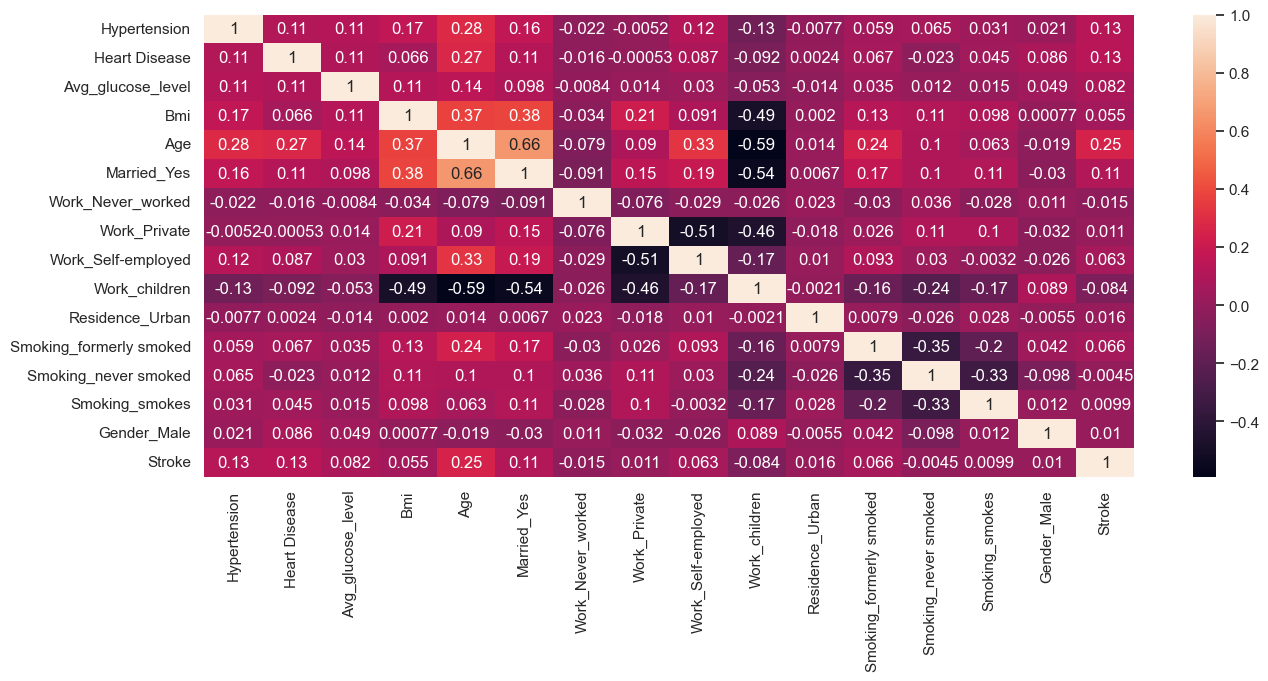

In [245]:
plt.figure(figsize=(15, 6))
corr_reg = df_coded.corr(method='spearman')
sns.heatmap(data=corr_reg, annot=True)

El BMI no está correlacionado con las demás variables. La inputación por regresión no es recomendable.

##### Imputación por KNN

In [246]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = RobustScaler()

df_knn = df.copy()

imputer = KNNImputer(n_neighbors=5)

# Seleccionar la columna 'Bmi' y convertirla a un dataframe de una sola columna
df_bmi = pd.DataFrame(df['Bmi'])

# Escalar y hacer la imputación de valores faltantes
# Escalar es necesario para el algoritmo de KNN
df_bmi = pd.DataFrame(scaler.fit_transform(df_bmi), columns=df_bmi.columns)
df_bmi = pd.DataFrame(imputer.fit_transform(df_bmi), columns=df_bmi.columns)
df_bmi = pd.DataFrame(scaler.inverse_transform(df_bmi), columns=df_bmi.columns)

# Asignar la columna imputada al dataframe original
df_knn['Bmi'] = df_bmi['Bmi']

In [247]:
df_knn.isnull().sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Stroke               0
dtype: int64

Nos quedaremos con la imputación por KNN, ya que el algoritmo KNN puede encontrar los k vecinos más cercanos a cada observación con valores faltantes y utilizar la información de los vecinos para predecir los valores faltantes.

#### Imputación de Smoking

In [248]:
df_knn['Smoking'].value_counts()

never smoked       1888
Unknown            1543
formerly smoked     885
smokes              787
Name: Smoking, dtype: int64

In [249]:
df_knn['Smoking'].value_counts(normalize=True)

never smoked       0.369978
Unknown            0.302371
formerly smoked    0.173427
smokes             0.154223
Name: Smoking, dtype: float64

In [250]:
df_knn['Smoking'] = df_knn['Smoking'].replace('Unknown', np.nan)

In [251]:
df_knn['Smoking'].value_counts()

never smoked       1888
formerly smoked     885
smokes              787
Name: Smoking, dtype: int64

In [252]:
df_knn['Smoking'].isnull().sum()

1543

**IterativeImputer con RandomForestClassifier()**

In [253]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier

# smoking = ['Smoking']

# # Convertir los valores categóricos en valores numéricos
# le = LabelEncoder()
# df_knn[smoking] = df_knn[smoking].apply(lambda series: pd.Series(
#     le.fit_transform(series[series.notnull()]),
#     index=series[series.notnull()].index
# ))

# print(df_knn['Smoking'].value_counts())

# # Imputación por KNN con k=5
# imputer = IterativeImputer(estimator=RandomForestClassifier(), 
#                                initial_strategy='most_frequent',
#                                max_iter=10, random_state=0)
# df_knn[smoking] = imputer.fit_transform(df_knn[smoking])

# # Volver a convertir los valores numéricos a categóricos
# df_knn[smoking] = df_knn[smoking].apply(lambda series: pd.Series(
#     le.inverse_transform(series.astype(int)),
#     index=series.index
# ))

# print(df_knn['Smoking'].value_counts())

In [254]:
# df_knn.isnull().sum()

**KNNImputer**

In [255]:
smoking = ['Smoking']

# Convertir los valores categóricos en valores numéricos
le = LabelEncoder()
df_knn[smoking] = df_knn[smoking].apply(lambda series: pd.Series(
    le.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

print(df_knn['Smoking'].value_counts())

# Imputación por KNN con k=5
imputer = KNNImputer(n_neighbors=5)
df_knn[smoking] = imputer.fit_transform(df_knn[smoking])

# Volver a convertir los valores numéricos a categóricos
df_knn[smoking] = df_knn[smoking].apply(lambda series: pd.Series(
    le.inverse_transform(series.astype(int)),
    index=series.index
))

print(df_knn['Smoking'].value_counts())

1.0    1888
0.0     885
2.0     787
Name: Smoking, dtype: int64
formerly smoked    2428
never smoked       1888
smokes              787
Name: Smoking, dtype: int64


In [256]:
df_knn.isnull().sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Stroke               0
dtype: int64

Se probó la KNNImputer y IterativeImputer con estimador RandomForestClassifier, pero KNNImputer resultó dar mejores métricas en la evaluación de los modelos en las siguientes secciones.

## Análisis de correlación

In [257]:
def cod_dummies(df, cat_cols, target_col):
  # Coficiación Dummie
  df_encoded = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, drop_first=True)

  # Mover Stroke al final
  df_encoded = df_encoded[[c for c in df_encoded if c != target_col] + [target_col]]

  return df_encoded

def plot_correlacion(df_encoded, target_col):
  # Crear tabla de correlaciones
  corr = df_encoded.corr(method='spearman')
  corr_target = corr[target_col].abs().sort_values(ascending=False)

  # Crear heatmap
  plt.figure(figsize=(15, 6))
  sns.heatmap(data=corr, annot=True)

  # Imprimir tabla de correlaciones
  print(corr_target)

In [258]:
cat_cols = ['Married', 'Work', 'Residence', 'Smoking', 'Gender', 'Hypertension', 'Heart Disease']
target_col = 'Stroke'

Stroke                  1.000000
Age                     0.248643
Heart Disease_1         0.132188
Hypertension_1          0.128906
Married_Yes             0.107543
Work_children           0.083605
Avg_glucose_level       0.082272
Work_Self-employed      0.063231
Bmi                     0.055082
Residence_Urban         0.015685
Work_Never_worked       0.014840
Work_Private            0.010541
Gender_Male             0.010431
Smoking_smokes          0.009877
Smoking_never smoked    0.004510
Name: Stroke, dtype: float64


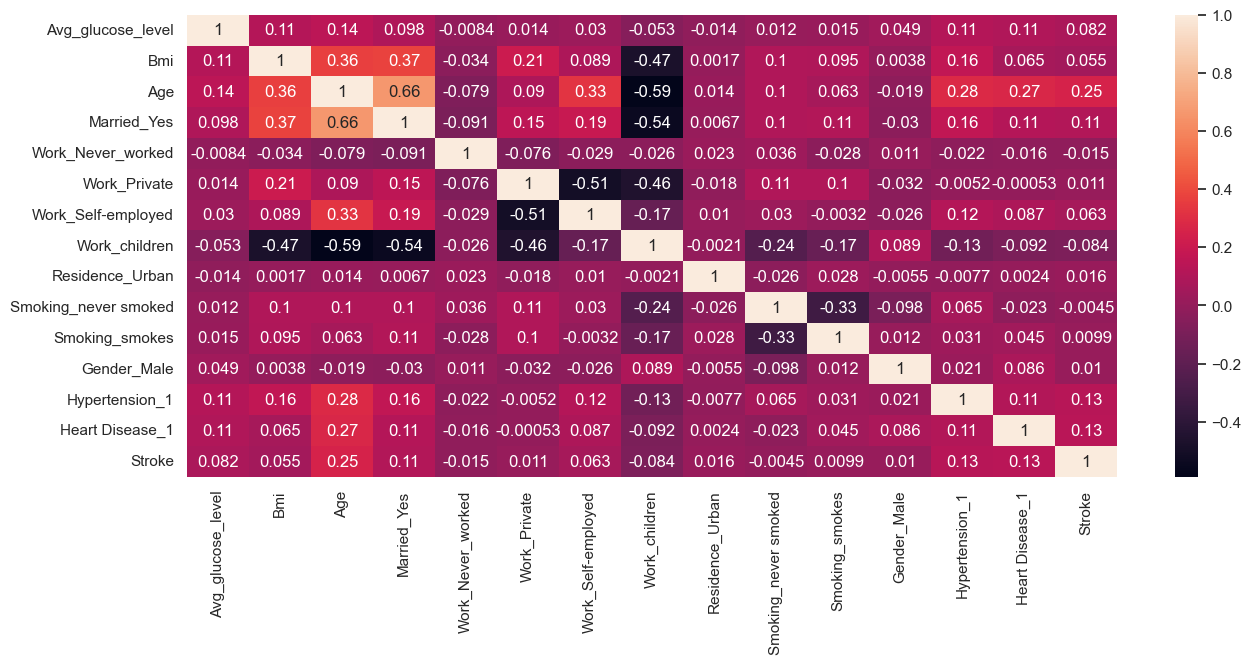

In [259]:
df_knn_coded = cod_dummies(df_knn, cat_cols, target_col)
plot_correlacion(df_knn_coded, target_col)

Se encontro que las variables que al parecer afectan en mayor medida a la variable de respuesta son:
1. Age
2. Heart Disease
3. Hypertension
4. Married

De las cuales Age, es la que tiene la correlación de Spearman más alta con Stroke.

## Visualización de datos

**Variables categóricas**

In [260]:
my_palette = ['#17becf', '#ff7f0e']

def cat_vars_viz(df, variables):
  fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(21,10))
    
  for i, variable in enumerate(variables):
    # Cálculo del número de fila y colúmna de cada subplot
    row = i // 4
    col = i % 4
    # Gráfico de countplot
    sns.countplot(x=variable, data=df, hue='Stroke', ax=axes[row, col], palette=my_palette)
    axes[row, col].set_xlabel(variable, fontsize=18, fontweight='bold')
    axes[row, col].set_ylabel('Count', fontsize=16)
    axes[row, col].legend(['No Stroke', 'Stroke'])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=25, fontsize=17)

  # Eliminar el último subplot en la última fila
  fig.delaxes(axes[1, 3])
  
  fig.suptitle('Countplots de Variables Categóricas por Stroke', fontsize=24, fontweight='bold')
  plt.tight_layout() # Ajustar automáticamente el espacio
  plt.show()

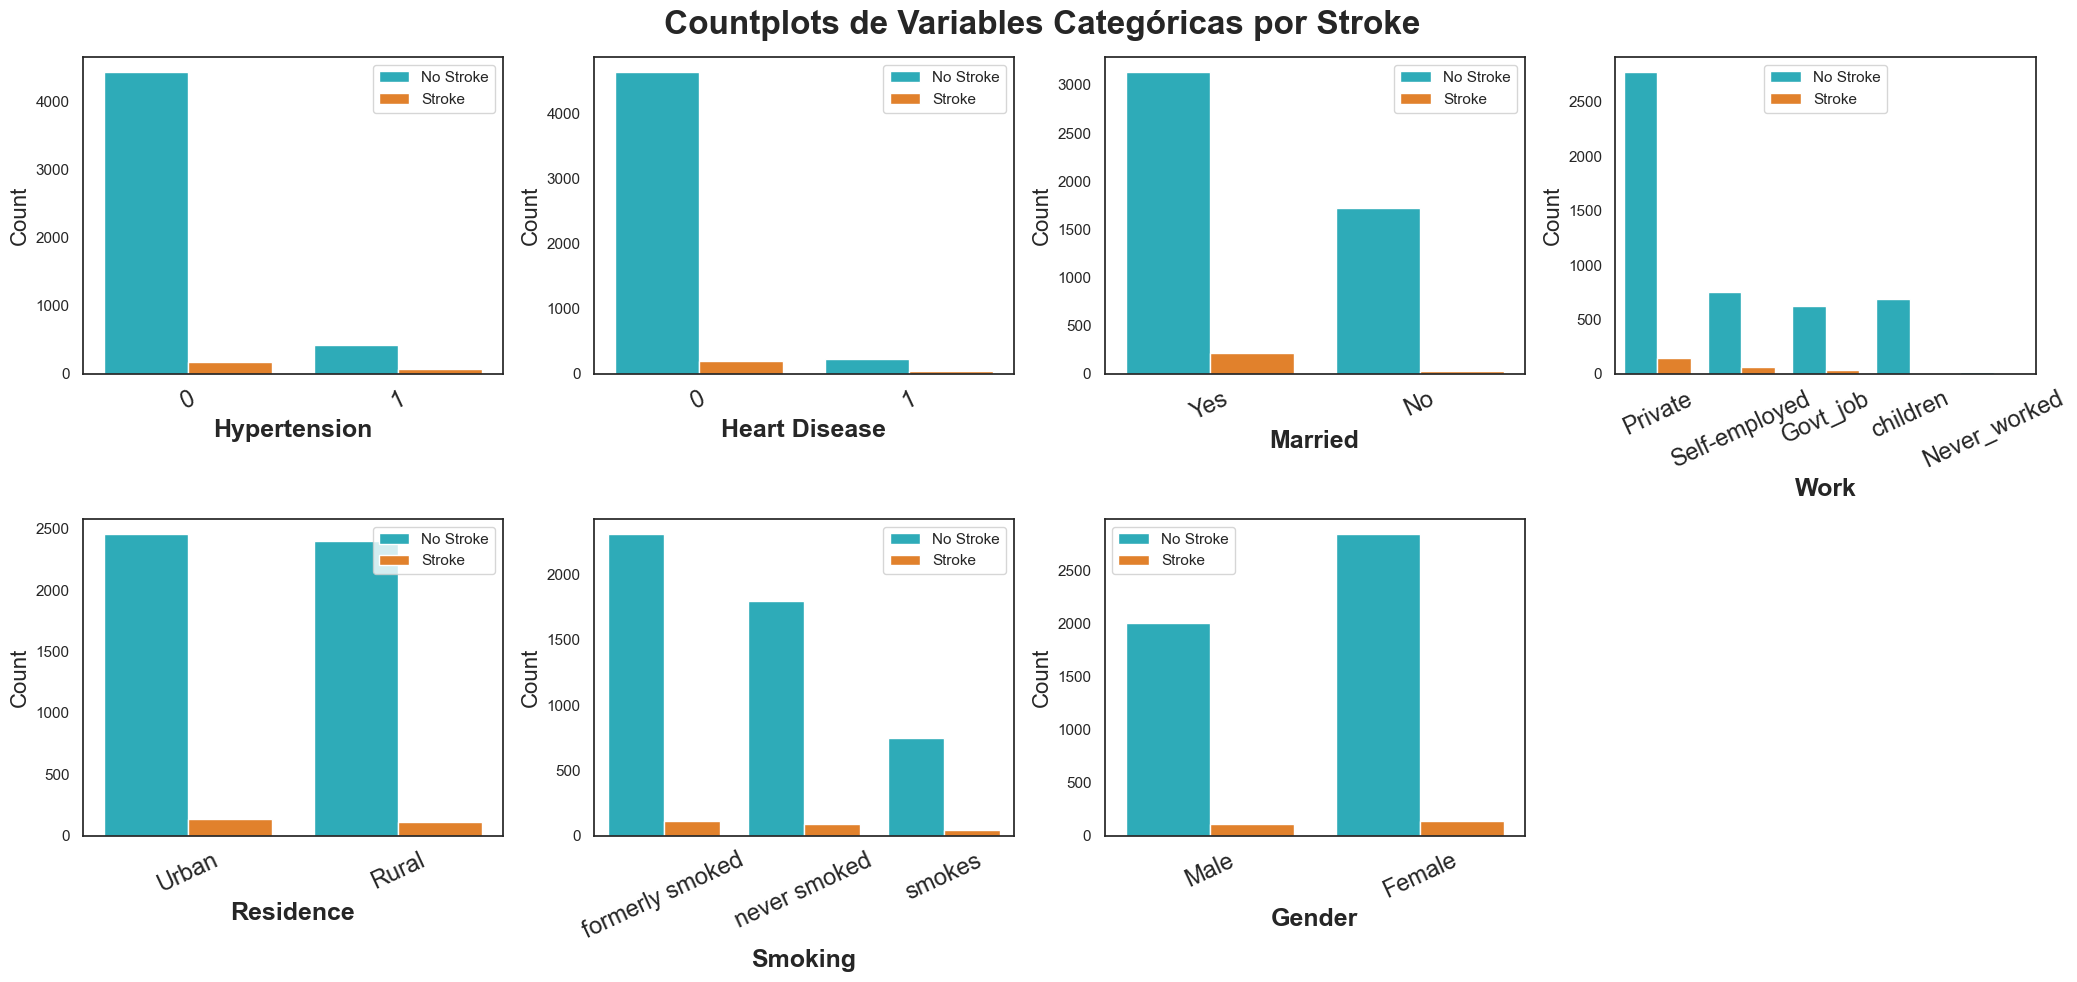

In [261]:
variables = ['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence', 'Smoking', 'Gender']
cat_vars_viz(df_knn, variables)

**Variables numéricas**

In [262]:
def num_vars_viz(df, target_col, variables):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
  for i, variable in enumerate(variables):
    sns.kdeplot(x=variable, data=df[df[target_col]==0], ax=axes[i], shade=True, alpha=1, label='No stroke', color='#17becf')
    sns.kdeplot(x=variable, data=df[df[target_col]==1], ax=axes[i], shade=True, alpha=0.8, label='Stroke', color='#ff7f0e')
    axes[i].set_xlabel(variable, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Probabilidad', fontsize=14)
    axes[i].legend()

  fig.suptitle('Distribuciones de Variables Numéricas por Stroke', fontsize=18, fontweight='bold')
  plt.tight_layout()
  plt.show()

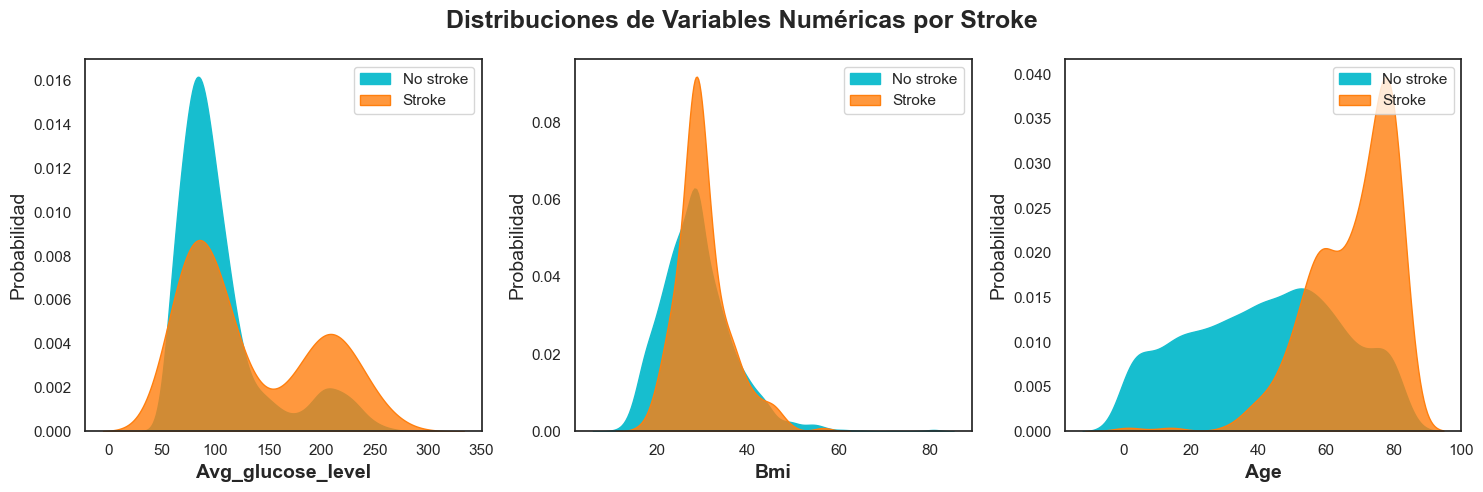

In [263]:
variables = ['Avg_glucose_level', 'Bmi', 'Age']
target_col = 'Stroke'

num_vars_viz(df_knn, target_col, variables)

**Variable de respuesta**

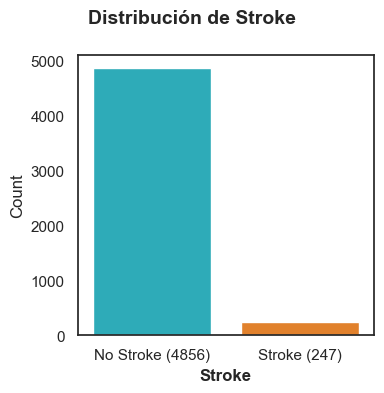

In [264]:
fig, axes = plt.subplots(figsize=(4,4))

sns.countplot(x='Stroke', data=df_knn, palette=my_palette, ax=axes)
axes.set_xlabel('Stroke', fontsize=12, fontweight='bold')
axes.set_ylabel('Count', fontsize=12)
axes.set_xticklabels(['No Stroke ({})'.format(df['Stroke'].value_counts()[0]), 'Stroke ({})'.format(df['Stroke'].value_counts()[1])])
fig.suptitle('Distribución de Stroke', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

## Escalamiento de variables numéricas

In [265]:
df = df_knn_coded.copy()

# Primero se escala las variables numéricas para garantizar una precisión adecuada en los modelos
def robust_scale(df, col):
  scaler = RobustScaler()
  df[col] = scaler.fit_transform(df[[col]])
  return df

def standard_scale(df, col):
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(df[[col]])
  return df

df = robust_scale(df, 'Avg_glucose_level')
df = robust_scale(df, 'Bmi')
df = standard_scale(df, 'Age')

In [266]:
df

,Avg_glucose_level,Bmi,Age,Married_Yes,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Residence_Urban,Smoking_never smoked,Smoking_smokes,Gender_Male,Hypertension_1,Heart Disease_1,Stroke
0,3.713355,0.911111,1.051813,1,0,1,0,0,1,0,0,1,0,1,1
1,2.994571,0.058846,0.786429,1,0,0,1,0,0,1,0,0,0,0,1
2,0.380836,0.455556,1.626813,1,0,1,0,0,0,1,0,1,0,1,1
3,2.153637,0.666667,0.255659,1,0,1,0,0,1,0,1,0,0,0,1
4,2.232085,-0.488889,1.582582,1,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,0.303746,-1.088889,-1.336648,0,0,0,0,1,0,0,0,0,0,0,0
5099,-0.220955,0.058846,1.626813,1,0,1,0,0,1,1,0,0,1,0,0
5100,-0.241585,0.244444,-0.363571,1,0,0,1,0,0,1,0,0,0,0,0
5101,2.019544,-0.311111,0.344121,1,0,1,0,0,0,0,0,1,0,0,0


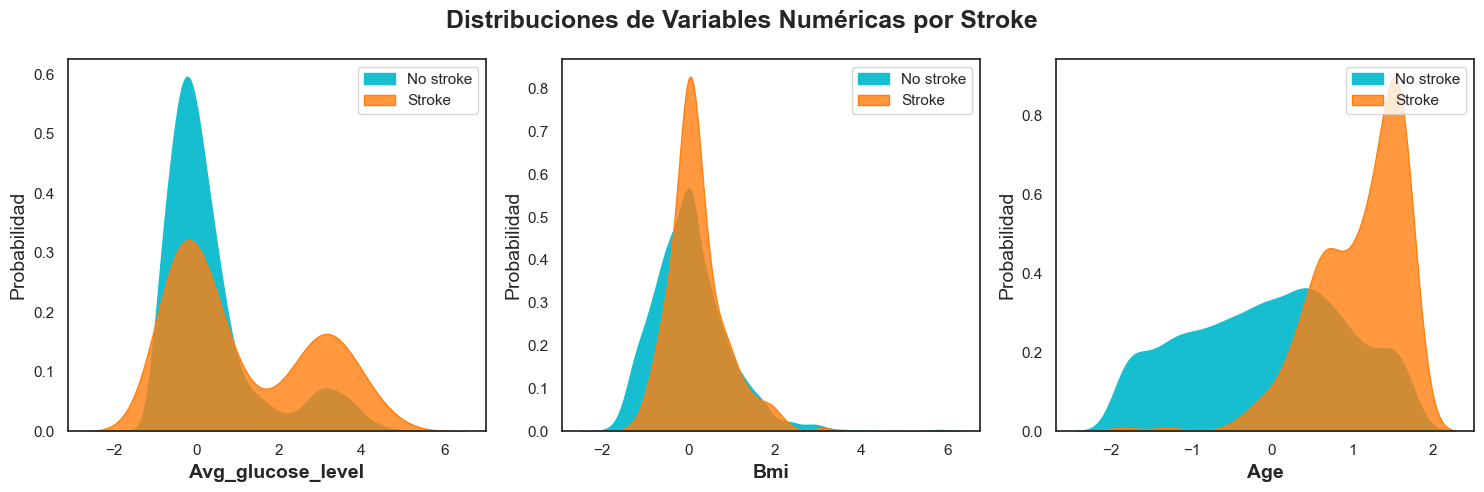

In [267]:
num_vars_viz(df, target_col, variables)

# **Partición de Datos**

In [268]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [269]:
y = df['Stroke']
X = df.drop('Stroke', axis=1)

In [270]:
# Separar el conjunto de datos en entrenamiento, validación y prueba (70%, 15% y 15%, respectivamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=1, stratify=y_train)

print(f'Tamaño entrenamiento (X): {X_train.shape}')
print(f'Tamaño validación (X): {X_val.shape}')
print(f'Tamaño prueba (X): {X_test.shape}')

Tamaño entrenamiento (X): (3571, 14)
Tamaño validación (X): (766, 14)
Tamaño prueba (X): (766, 14)


# **Técnicas de Balanceo**

In [271]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

## Oversamplig: SMOTE

In [272]:
smote = SMOTE(random_state=1)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f'Tamaño entrenamiento con SMOTE: {y_train_sm.shape[0]} observaciones')
print(f'Distribución de Stroke:\n{y_train_sm.value_counts()}')

Tamaño entrenamiento con SMOTE: 6796 observaciones
Distribución de Stroke:
0    3398
1    3398
Name: Stroke, dtype: int64


## Undersamplig: NearMiss

In [273]:
nearmiss = NearMiss(version=2)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

print(f'Tamaño entrenamiento con NearMiss: {y_train_nm.shape[0]} observaciones')
print(f'Distribución de Stroke:\n{y_train_nm.value_counts()}')

Tamaño entrenamiento con NearMiss: 346 observaciones
Distribución de Stroke:
0    173
1    173
Name: Stroke, dtype: int64


## Oversamplig y Undersamplig: SMOTETomek

In [274]:
smote_T = SMOTETomek(random_state=1)
X_train_smt, y_train_smt = smote_T.fit_resample(X_train, y_train)

print(f'Tamaño entrenamiento con SMOTETomek: {y_train_smt.shape[0]} observaciones')
print(f'Distribución de Stroke:\n{y_train_smt.value_counts()}')

Tamaño entrenamiento con SMOTETomek: 6782 observaciones
Distribución de Stroke:
0    3391
1    3391
Name: Stroke, dtype: int64


## SMOTE vs NearMiss vs SMOTETomek

Se evaluarán ambas técnicas utilizando el modelo de Regresión Logística, mediante **matrices de confusión** y un **informe de clasificación** que describe el desempeño del modelo de clasificación.

In [275]:
# Función que crea y entrena el modelo de regresión logística
def run_model(X_train, X_test, y_train, y_test):
  reg_log = LogisticRegression(random_state=1)
  reg_log.fit(X_train, y_train)
  return reg_log

#definimos funciona para mostrar los resultados
def resultados_modelo(y_test, pred_y):
  # Se crea la matriz de confusión
  matriz_conf = confusion_matrix(y_test, pred_y)
  plt.figure(figsize=(6, 5))
  sns.heatmap(matriz_conf, annot=True, fmt="d");
  plt.title("Matriz de confusión")
  plt.ylabel('Reales')
  plt.xlabel('Predicciones')
  plt.show()
  print('')
  # Se muestra el informe de clasificación
  print(classification_report(y_test, pred_y))

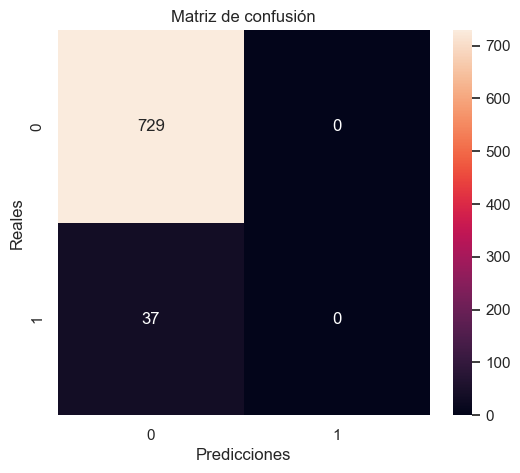


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       729
           1       0.00      0.00      0.00        37

    accuracy                           0.95       766
   macro avg       0.48      0.50      0.49       766
weighted avg       0.91      0.95      0.93       766



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [276]:
# Sin aplicar técnicas de balanceo
model_base = run_model(X_train, X_val, y_train, y_val)
pred_y = model_base.predict(X_val)
resultados_modelo(y_val, pred_y)

De 37 casos de Stroke, el modelo con los datos desbalanceados no predijo ni un caso de stroke, esto indica el recall de 0. Además esto indica que se tienen 32 falsos negativos, lo que puede ser muy perjudicial ya que se está clasificando como sano a un paciente que en relidad le dió un ataque cerebral.

Sin duda, son necesarias las técnicas de balanceo; las cuales se evaluarán a continuación.

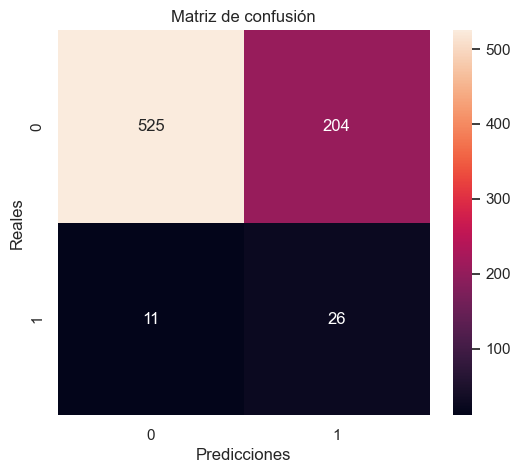


              precision    recall  f1-score   support

           0       0.98      0.72      0.83       729
           1       0.11      0.70      0.19        37

    accuracy                           0.72       766
   macro avg       0.55      0.71      0.51       766
weighted avg       0.94      0.72      0.80       766



In [277]:
# SMOTE
model_sm = run_model(X_train_sm, X_val, y_train_sm, y_val)
pred_y_sm = model_sm.predict(X_val)

resultados_modelo(y_val, pred_y_sm)

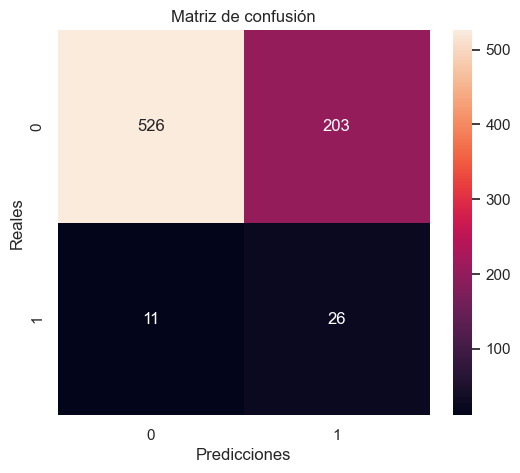


              precision    recall  f1-score   support

           0       0.98      0.72      0.83       729
           1       0.11      0.70      0.20        37

    accuracy                           0.72       766
   macro avg       0.55      0.71      0.51       766
weighted avg       0.94      0.72      0.80       766



In [278]:
# SMOTETomek
model_smt = run_model(X_train_smt, X_val, y_train_smt, y_val)
pred_y_smt = model_smt.predict(X_val)

resultados_modelo(y_val, pred_y_smt)

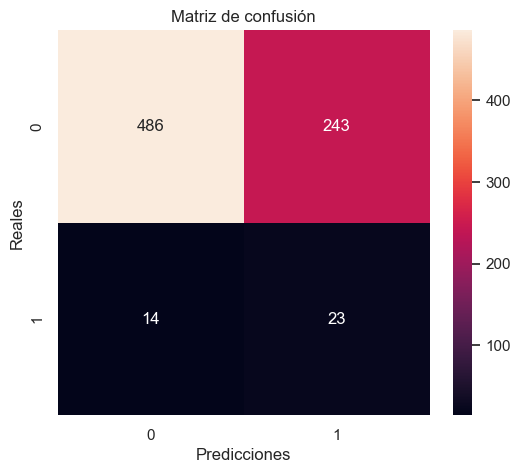


              precision    recall  f1-score   support

           0       0.97      0.67      0.79       729
           1       0.09      0.62      0.15        37

    accuracy                           0.66       766
   macro avg       0.53      0.64      0.47       766
weighted avg       0.93      0.66      0.76       766



In [279]:
# NearMiss
model_nm = run_model(X_train_nm, X_val, y_train_nm, y_val)
pred_y_nm = model_nm.predict(X_val)

resultados_modelo(y_val, pred_y_nm)

### Test de McNemar

Tabla de contingencia

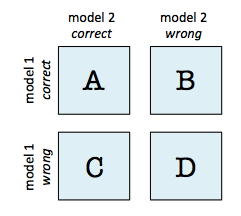

http://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/#:~:text=McNemar%27s%20Test%20%28sometimes%20also%20called%20%22within-subjects%20chi-squared%20test%22%29,2%20contingency%20table%20of%20the%20two%20model%27s%20predictions.

In [280]:
from mlxtend.evaluate import mcnemar_table, mcnemar

Tabla de contingencia de SMOTE vs SMOTETomek

In [281]:
# Etiquetas reales
y_target = y_val

# Etiquetas predichas por el modelo con SMOTE
y_model1 = pred_y_sm

# Etiquetas predichas por el modelo con SMOTETomek
y_model2 = pred_y_smt

tabla_cont_sm_smt = mcnemar_table(y_target = y_target, 
                   y_model1 = y_model1, 
                   y_model2 = y_model2)

print(tabla_cont_sm_smt)

[[551   0]
 [  1 214]]


Tabla de contingencia de SMOTETomek vs NearMiss

In [282]:
# Etiquetas reales
y_target = y_val

# Etiquetas predichas por el modelo con SMOTE
y_model1 = pred_y_smt

# Etiquetas predichas por el modelo con SMOTETomek
y_model2 = pred_y_nm

# Tabla de contingencia
tabla_cont_smt_nm = mcnemar_table(y_target = y_target, 
                   y_model1 = y_model1, 
                   y_model2 = y_model2)

print(tabla_cont_smt_nm)

[[468  84]
 [ 41 173]]


**Test de McNemar: SMOTE vs SMOTETomek**

In [283]:
# Test de McNemar
chi2, p = mcnemar(ary=tabla_cont_sm_smt, exact=True) # exact=True - Distribución binomial

# Interpretación de los resultados
print('Test de McNemar: SMOTE vs SMOTETomek')
print('chi-squared:', chi2)
print('p-value:', p)

alpha = 0.05
if p > alpha:
    print('Conclusión: No hay una diferencia significativa en el rendimiento entre los modelos')
else:
    print('Conclusión: Hay una diferencia significativa en el rendimiento entre los modelos')

Test de McNemar: SMOTE vs SMOTETomek
chi-squared: None
p-value: 1.0
Conclusión: No hay una diferencia significativa en el rendimiento entre los modelos


**Test de McNemar: SMOTETomek vs NearMiss**

In [284]:
# Test de McNemar
chi2, p = mcnemar(ary=tabla_cont_smt_nm, corrected=True) # Distribución chi-cuadrado: Corrección de continuidad de Edward

# Interpretación de los resultados
print('Test de McNemar: SMOTETomek vs NearMiss')
print('chi-squared:', '{:.2f}'.format(chi2))
print('p-value:', '{:.8f}'.format(p))

alpha = 0.05
if p > alpha:
    print('Conclusión: No hay una diferencia significativa en el rendimiento entre los modelos')
else:
    print('Conclusión: Hay una diferencia significativa en el rendimiento entre los modelos')

Test de McNemar: SMOTETomek vs NearMiss
chi-squared: 14.11
p-value: 0.00017224
Conclusión: Hay una diferencia significativa en el rendimiento entre los modelos


### Conclusión

1. Para seleccionar la mejor técnica **se dio la misma importancia** al costo que tiene clasificar a un paciente con stroke cuando en realidad está sano, que el costo que tiene clasificar a un paciente sano cuando en realidad tiene stroke. 
**Importancia de FP = Importancia de FN**
Por lo tanto, nos enfocaremos en analizar la métrica de f1-score, ya que combina tanto la precisión como el recall en una sola medida.

2. Con el test de McNemar se comprobó estadísticamente que no existe diferencia significativa entre SMOTE y SMOTETomek; pero si entre SMOTETomek y NearMiss.

3. En este sentido, se encontró que SMOTE Y SMOTETomek son las mejores, incluso dieron exáctamente los mismos resultados en todas las métricas; lo que se corrobora con el Test de McNemar. Con un valor de f1-score de 0.19, un recall de 0.70 y un accuracy de 0.71; lo que indica que ambas técnicas lograron mejorar considerablemente el modelo.

4. Se podrían escoger cualquiera de las dos técnicas; sin emnbargo, **se escogerá SMOTETomek** debido a que combina la técnica de sobremuestreo de SMOTE con la técnica de submuestreo Tomek Links, lo que permite reducir la complejidad del modelo y mejorar la generalización.

# **Implementación de Modelos**

In [285]:
resultados = pd.DataFrame(columns = ['Regresíon Logística', 'KNN', 'Random Forest', 'Gradient Boosting'], index = range(5))

In [286]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

## Regresión Logística

Matriz de confusión y reporte de clasificación



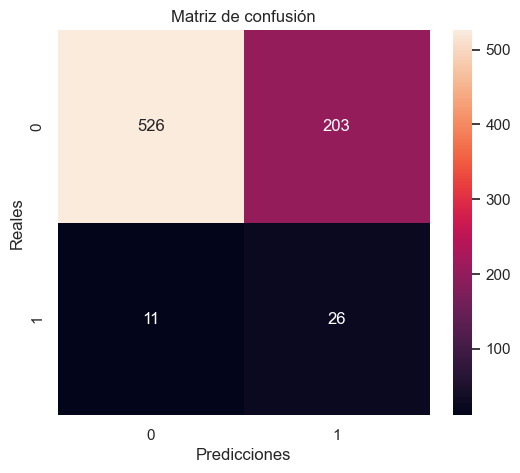


              precision    recall  f1-score   support

           0       0.98      0.72      0.83       729
           1       0.11      0.70      0.20        37

    accuracy                           0.72       766
   macro avg       0.55      0.71      0.51       766
weighted avg       0.94      0.72      0.80       766

None

-----------------------------------------------

Métricas de evaluación:

Accuracy: 0.72
Precision: 0.11
Sensibilidad: 0.70
Especificidad: 0.72
ROC AUC: 0.71

-----------------------------------------------

Curva ROC:



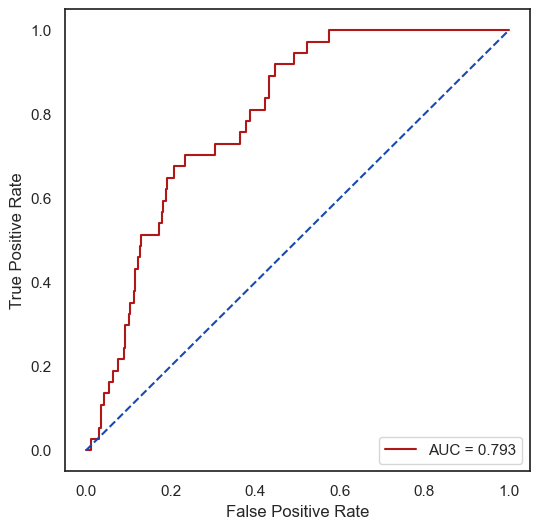

In [287]:
reg_log = LogisticRegression(random_state=1)
reg_log.fit(X_train_smt, y_train_smt)
y_pred = reg_log.predict(X_val)
y_prob = reg_log.predict_proba(X_val)[:,1]

# Matriz de confusión y reporte de clasificación
print('Matriz de confusión y reporte de clasificación')
print('')
print(resultados_modelo(y_val, y_pred))

# Calcular las métricas
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, pos_label=1)
recall_VP = recall_score(y_val, y_pred, pos_label=1)
recall_VN = recall_score(y_val, y_pred, pos_label=0)
roc_auc = roc_auc_score(y_val, y_pred)
print('')
print('-----------------------------------------------')
print('')
print('Métricas de evaluación:')
print('')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensibilidad: {recall_VP:.2f}')
print(f'Especificidad: {recall_VN:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print('')
print('-----------------------------------------------')
print('')

# ROC curve
print('Curva ROC:')
print('')

fpr, tpr, thr = roc_curve(y_val, y_prob)

roc_auc = auc(fpr, tpr)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color = '#174ab0', linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Agregar resultados al df comparativo de modelos
resultados.iloc[0, 0] = round(accuracy, 2)
resultados.iloc[1, 0] = round(precision, 2)
resultados.iloc[2, 0] = round(recall_VP, 2)
resultados.iloc[3, 0] = round(recall_VN, 3)
resultados.iloc[4, 0] = round(roc_auc, 3)

## KNN

In [288]:
from sklearn.neighbors import KNeighborsClassifier

# Se prueban para diferentes valores de K (1-14)
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_smt, y_train_smt)
    results.append({
        'k': k,
        'recall_score': recall_score(y_val, knn.predict(X_val))
    })

# Se crea un df con los resultados según f1_score
results = pd.DataFrame(results)
print(results)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

     k  recall_score
0    1      0.189189
1    2      0.135135
2    3      0.324324
3    4      0.297297
4    5      0.459459
5    6      0.378378
6    7      0.540541
7    8      0.486486
8    9      0.648649
9   10      0.594595
10  11      0.648649
11  12      0.594595
12  13      0.621622
13  14      0.540541


In [289]:
print('El mejor k según recall_score es:')
results.iloc[results['recall_score'].idxmax()]

El mejor k según recall_score es:


k               9.000000
recall_score    0.648649
Name: 8, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Matriz de confusión y reporte de clasificación



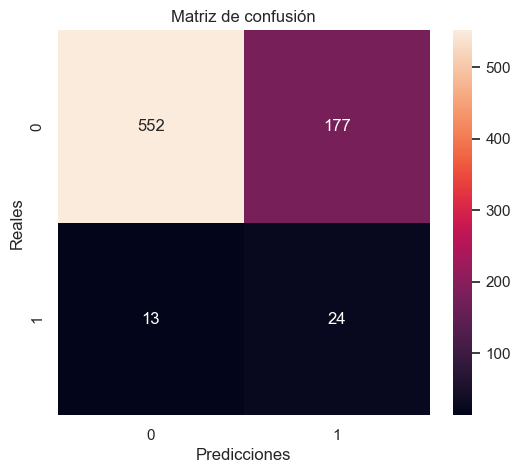


              precision    recall  f1-score   support

           0       0.98      0.76      0.85       729
           1       0.12      0.65      0.20        37

    accuracy                           0.75       766
   macro avg       0.55      0.70      0.53       766
weighted avg       0.94      0.75      0.82       766

None

-----------------------------------------------

Métricas de evaluación:

Accuracy: 0.75
Precision: 0.12
Sensibilidad: 0.65
Especificidad: 0.76
ROC AUC: 0.70

-----------------------------------------------

Curva ROC



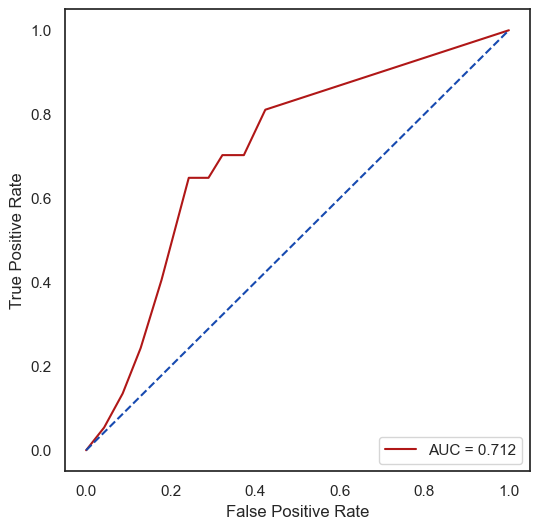

In [290]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_smt, y_train_smt)
y_pred = knn.predict(X_val)
y_prob = knn.predict_proba(X_val)[:,1]

# Matriz de confusión y reporte de clasificación
print('Matriz de confusión y reporte de clasificación')
print('')
print(resultados_modelo(y_val, y_pred))

# Calcular las métricas
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, pos_label=1)
recall_VP = recall_score(y_val, y_pred, pos_label=1)
recall_VN = recall_score(y_val, y_pred, pos_label=0)
roc_auc = roc_auc_score(y_val, y_pred)
print('')
print('-----------------------------------------------')
print('')
print('Métricas de evaluación:')
print('')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensibilidad: {recall_VP:.2f}')
print(f'Especificidad: {recall_VN:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print('')
print('-----------------------------------------------')
print('')

# ROC curve
print('Curva ROC')
print('')

fpr, tpr, thr = roc_curve(y_val, y_prob)

roc_auc = auc(fpr, tpr)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color = '#174ab0', linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Agregar resultados al df comparativo de modelos
resultados.iloc[0, 1] = round(accuracy, 2)
resultados.iloc[1, 1] = round(precision, 2)
resultados.iloc[2, 1] = round(recall_VP, 2)
resultados.iloc[3, 1] = round(recall_VN, 3)
resultados.iloc[4, 1] = round(roc_auc, 3)

## Random Forest

In [291]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold
from scipy.stats import randint

In [292]:
import multiprocessing

In [293]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
rf_grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'recall',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

rf_grid.fit(X_train_smt, y_train_smt)

# Resultados
# ==============================================================================
resultados_grid = pd.DataFrame(rf_grid.cv_results_)
resultados_grid.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
189,entropy,20,5,1,2,150,0.974986,0.007200,1.0,0.0
108,entropy,None,5,1,2,150,0.974391,0.006590,1.0,0.0
81,gini,20,5,1,2,150,0.973603,0.006720,1.0,0.0
0,gini,None,5,1,2,150,0.972796,0.006903,1.0,0.0


In [294]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(rf_grid.best_params_, ":", rf_grid.best_score_, rf_grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150} : 0.9749855372760226 recall


Matriz de confusión y reporte de clasificación



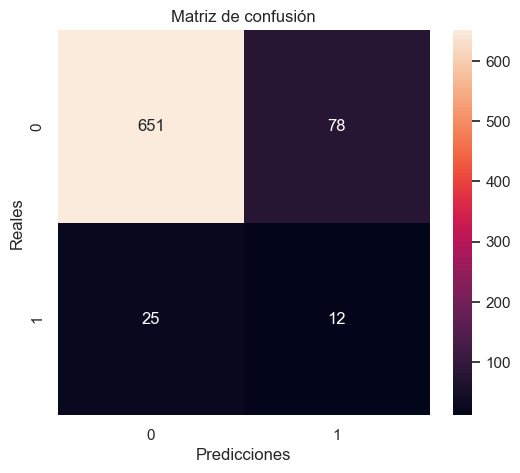


              precision    recall  f1-score   support

           0       0.96      0.89      0.93       729
           1       0.13      0.32      0.19        37

    accuracy                           0.87       766
   macro avg       0.55      0.61      0.56       766
weighted avg       0.92      0.87      0.89       766

None

-----------------------------------------------

Métricas de evaluación:

Accuracy: 0.87
Precision: 0.13
Sensibilidad: 0.32
Especificidad: 0.89
ROC AUC: 0.61

-----------------------------------------------

Curva ROC



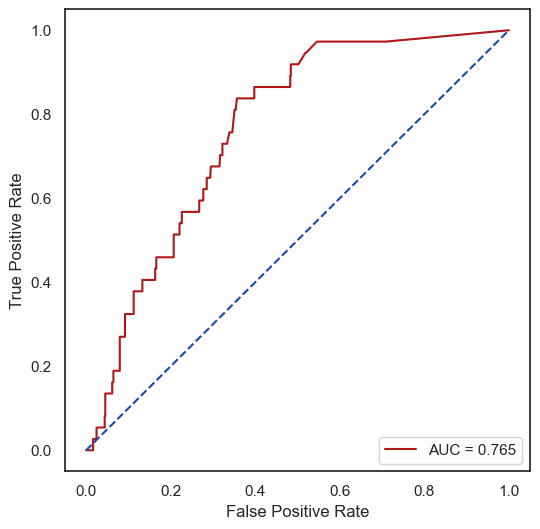

In [295]:
rf_best = rf_grid.best_estimator_
y_pred = rf_best.predict(X_val)
y_prob = rf_best.predict_proba(X_val)[:,1]

# Matriz de confusión y reporte de clasificación
print('Matriz de confusión y reporte de clasificación')
print('')
print(resultados_modelo(y_val, y_pred))

# Calcular las métricas
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, pos_label=1)
recall_VP = recall_score(y_val, y_pred, pos_label=1)
recall_VN = recall_score(y_val, y_pred, pos_label=0)
roc_auc = roc_auc_score(y_val, y_pred)
print('')
print('-----------------------------------------------')
print('')
print('Métricas de evaluación:')
print('')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensibilidad: {recall_VP:.2f}')
print(f'Especificidad: {recall_VN:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print('')
print('-----------------------------------------------')
print('')

# ROC curve
print('Curva ROC')
print('')

fpr, tpr, thr = roc_curve(y_val, y_prob)

roc_auc = auc(fpr, tpr)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color = '#174ab0', linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Agregar resultados al df comparativo de modelos
resultados.iloc[0, 2] = round(accuracy, 2)
resultados.iloc[1, 2] = round(precision, 2)
resultados.iloc[2, 2] = round(recall_VP, 2)
resultados.iloc[3, 2] = round(recall_VN, 3)
resultados.iloc[4, 2] = round(roc_auc, 3)

## Gradient Boosting

In [296]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'recall',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X_train_smt, y_train_smt)

# Resultados
# ==============================================================================
resultados_grid = pd.DataFrame(grid.cv_results_)
resultados_grid.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
12,0.001,None,sqrt,500,0.5,0.975553,0.004251,1.0,0.0
20,0.001,None,log2,500,0.5,0.975553,0.004251,1.0,0.0
164,0.01,None,log2,500,0.5,0.975544,0.003424,1.0,0.0
156,0.01,None,sqrt,500,0.5,0.975544,0.003424,1.0,0.0


In [297]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.001, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500, 'subsample': 0.5} : 0.9755527599019973 recall


Matriz de confusión y reporte de clasificación



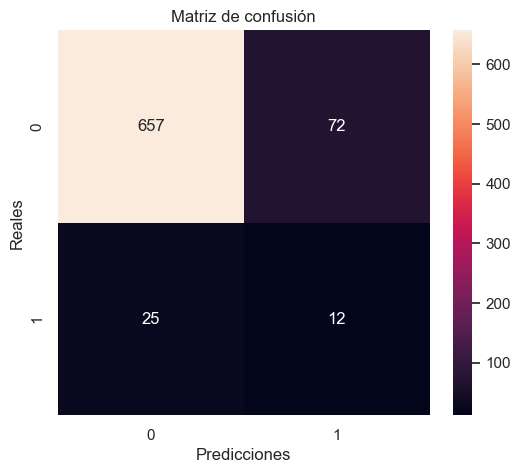


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       729
           1       0.14      0.32      0.20        37

    accuracy                           0.87       766
   macro avg       0.55      0.61      0.56       766
weighted avg       0.92      0.87      0.90       766

None

-----------------------------------------------

Métricas de evaluación:

Accuracy: 0.87
Precision: 0.14
Sensibilidad: 0.32
Especificidad: 0.90
ROC AUC: 0.61

-----------------------------------------------

Curva ROC



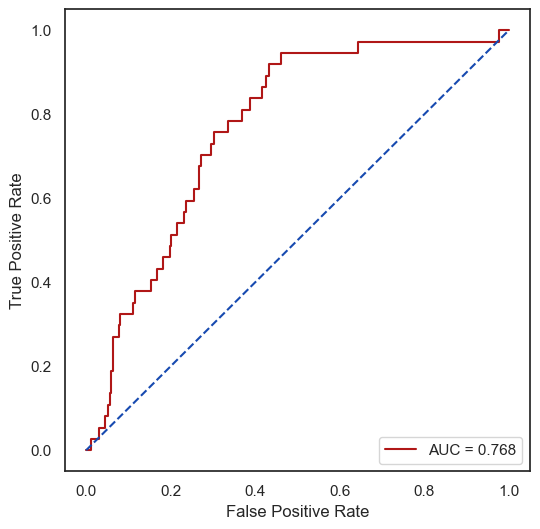

In [298]:
gb_best = grid.best_estimator_
y_pred = gb_best.predict(X_val)
y_prob = gb_best.predict_proba(X_val)[:,1]

# Matriz de confusión y reporte de clasificación
print('Matriz de confusión y reporte de clasificación')
print('')
print(resultados_modelo(y_val, y_pred))

# Calcular las métricas
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, pos_label=1)
recall_VP = recall_score(y_val, y_pred, pos_label=1)
recall_VN = recall_score(y_val, y_pred, pos_label=0)
roc_auc = roc_auc_score(y_val, y_pred)
print('')
print('-----------------------------------------------')
print('')
print('Métricas de evaluación:')
print('')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensibilidad: {recall_VP:.2f}')
print(f'Especificidad: {recall_VN:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print('')
print('-----------------------------------------------')
print('')

# ROC curve
print('Curva ROC')
print('')

fpr, tpr, thr = roc_curve(y_val, y_prob)

roc_auc = auc(fpr, tpr)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color = '#174ab0', linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Agregar resultados al df comparativo de modelos
resultados.iloc[0, 3] = round(accuracy, 2)
resultados.iloc[1, 3] = round(precision, 2)
resultados.iloc[2, 3] = round(recall_VP, 2)
resultados.iloc[3, 3] = round(recall_VN, 3)
resultados.iloc[4, 3] = round(roc_auc, 3)

In [299]:
resultados

,Regresíon Logística,KNN,Random Forest,Gradient Boosting
0,0.72,0.75,0.87,0.87
1,0.11,0.12,0.13,0.14
2,0.7,0.65,0.32,0.32
3,0.722,0.757,0.893,0.901
4,0.793,0.712,0.765,0.768


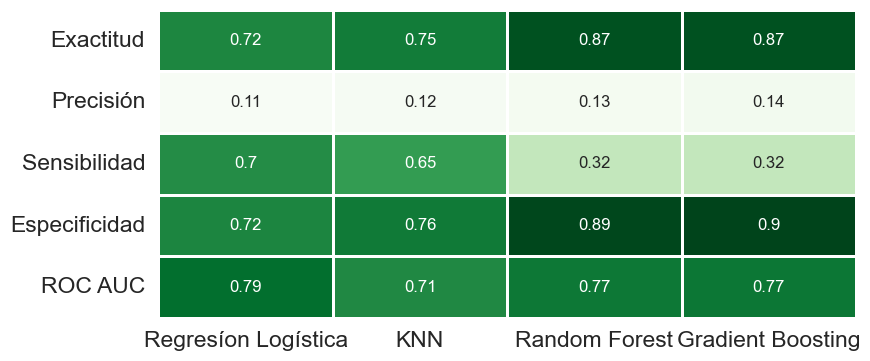

In [306]:
plt.figure(figsize = (9, 4))
sns.heatmap(resultados[resultados.columns.to_list()].astype(float), cmap = 'Greens', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Exactitud', 'Precisión', 'Sensibilidad', 'Especificidad', 'ROC AUC'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

## Selección de variables (RF)

**feature_importances_** es una propiedad importante y útil de los modelos de **Random Forest** que proporciona información sobre la importancia relativa de cada variable en el modelo, y que puede ser utilizada para seleccionar variables y para interpretar el modelo.

La importancia de las variables se calcula según la ganancia de información que aporta cada variable para separar los datos en cada nodo del árbol de decisión de Random Forest. Es decir, cuánto reduce la entropía o la impureza de la distribución de clases en un nodo determinado. A medida que se sube en el árbol, las variables que proporcionan la mayor ganancia de información en cada nodo se consideran las más importantes.

In [301]:
X_train_smt.columns.to_list()

['Avg_glucose_level',
 'Bmi',
 'Age',
 'Married_Yes',
 'Work_Never_worked',
 'Work_Private',
 'Work_Self-employed',
 'Work_children',
 'Residence_Urban',
 'Smoking_never smoked',
 'Smoking_smokes',
 'Gender_Male',
 'Hypertension_1',
 'Heart Disease_1']

In [302]:
# Modelo de random forest
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_smt, y_train_smt)

# Importancia de las variables predictivas
f_imp = pd.DataFrame(columns = ['Variable', 'Importancia'], index = range(14))

for i in range(len(f_imp.index)):
  f_imp.iloc[i, 0] = X_train_smt.columns.to_list()[i]

# Se calcula la importancia relativa de cada variable
f_imp['Importancia'] = rf.feature_importances_
# Se ordena de mayor a menor
f_imp = f_imp.sort_values('Importancia', ascending = False)
f_imp[0:12].style.background_gradient(cmap = 'Blues')

,Variable,Importancia
2,Age,0.411450
1,Bmi,0.191251
0,Avg_glucose_level,0.172351
9,Smoking_never smoked,0.029767
11,Gender_Male,0.028558
5,Work_Private,0.028521
3,Married_Yes,0.025331
8,Residence_Urban,0.023581
7,Work_children,0.022381
10,Smoking_smokes,0.020437


Las variables más importantes según la importancia asegnada por el algoritmo de Random Forest son: Age, Bmi y Avg_glucose_level.

# **Referencias**

GeeksforGeeks. (2020). Seaborn Heatmap – A comprehensive guide. https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/

GeeksforGeeks. (2022). ML | Handling Imbalanced Data with SMOTE and Near Miss Algorithm in Python. https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

GeeksforGeeks. (2022). Seaborn Kdeplot – A Comprehensive Guide. https://www.geeksforgeeks.org/seaborn-kdeplot-a-comprehensive-guide/

Lemaitre, G., Nogueira, F., & Aridas, C. K. (2017). Imbalanced-learn: A python toolbox to tackle the curse of imbalanced datasets in machine learning. Journal of Machine Learning Research, 18(17), 1-5. https://imbalanced-learn.org/stable/index.html

Na8. (2019). Clasificación con datos desbalanceados. https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

pandas. (2021). pandas.DataFrame.corr. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

Raschka, S. (2020). mcnemar: Prueba de McNemar para comparaciones de clasificadores. http://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/#:~:text=McNemar%27s%20Test%20%28sometimes%20also%20called%20%22within-subjects%20chi-squared%20test%22%29,2%20contingency%20table%20of%20the%20two%20model%27s%20predictions.

Scikit-learn. (s. f.). classification_report. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Scikit-learn. (s. f.). Compare the effect of different scalers on data with outliers. https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Scikit-learn. (s. f.). confusion_matrix. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Scikit-learn. (s. f.). KNNImputer. https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer

Scikit-learn. (s. f.). RobustScaler. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

stackoverflow. (2023). Implementing KNN imputation on categorical variables in an sklearn pipeline. https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline

StatsModels. (2021). statsmodels.stats.contingency_tables.mcnemar. https://www.statsmodels.org/stable/generated/statsmodels.stats.contingency_tables.mcnemar.html

Waskom, M. (2021). seaborn.countplot. https://seaborn.pydata.org/generated/seaborn.countplot.html

Waskom, M. (2021). seaborn.kdeplot. https://seaborn.pydata.org/generated/se

Amat, J. (2020). Random Forest con Python. Random Forest python (cienciadedatos.net)

Amat, J. (2020). Gradient Boosting con Python. Gradient Boosting con python (cienciadedatos.net)

Koehrsen, W. (2018). Hyperparameter Tuning the Random Forest in Python. Hyperparameter Tuning the Random Forest in Python | by Will Koehrsen | Towards Data Science

Scikit-learn. (s. f.). RandomForestClassifier. sklearn.ensemble.RandomForestClassifier — scikit-learn 1.2.2 documentation

Scikit-learn. (s. f.). GradientBoostingClassifier. sklearn.ensemble.GradientBoostingClassifier — scikit-learn 1.2.2 documentation

Scikit-learn. (s. f.). GridSearchCV. sklearn.model_selection.GridSearchCV — scikit-learn 1.2.2 documentation